In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import time
import pandas as pd
import numpy as np
import numba
from numba import jit
import empyrical as emp
import random
import tushare as ts
from common.config import Config

from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

CONF = Config('../conf/secret.yaml').data[0]
ts_token = CONF['TUSHARE']['TOKEN']
ts.set_token(ts_token)
pro = ts.pro_api()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
HS300_df = pd.read_csv('../database/HS300IDX_ALL.csv')
HS300 = list(set(HS300_df.con_code))
HS300 = [x.split('.')[0] for x in HS300]

ZZ500_df = pd.read_csv('../database/ZZ500IDX_ALL.csv')
ZZ500_df = pd.concat([HS300_df, ZZ500_df])
ZZ500 = list(set(ZZ500_df.con_code))
ZZ500 = [x.split('.')[0] for x in ZZ500]

HS300_df.dtypes

HS300_df[HS300_df.trade_date <= 20100104].tail(301)

In [ ]:
df = pro.daily(ts_code='600703.SH', start_date='20180101', end_date='20181101')
df.head(2)

df = ts.pro_bar(pro_api=pro, ts_code='600703.SH', adj='qfq', start_date='20180101', end_date='20181101')
df.head(2)

df = ts.get_k_data(code='600703', ktype='D', autype='qfq', index=False, start='2018-01-01', end='2018-11-01')
df.head(2)

In [ ]:
df = pro.fund_daily(ts_code='160417.SZ', start_date='20110101', end_date='20150101')
df

df = ts.get_k_data(code='160417', ktype='D', autype='qfq', index=False, start='2005-01-01', end=time.strftime('%Y-%m-%d'))
df

'000312'
'163407'

In [ ]:
# temp_df = pro.fund_daily(ts_code='163407.SZ', start_date='20170101', end_date='20190101')
# df = df.append(temp_df)
# df

# df.reset_index(drop=False, inplace=True)
# df = df.assign(trade_date=pd.to_datetime(df['trade_date'], format='%Y%m%d'))
# df.set_index(['trade_date'], inplace=True)
# df['trade_date'] = df['trade_date'].apply(lambda x: x.to_timestamp().to_datetime64())
# df.dtypes
# df.set_index(keys=['trade_date'], inplace=True)
# df = df.sort_index()
df

display_charts(df, chart_type='stock', y=['open'], figsize=(900, 400))

In [ ]:
# df = pro.daily_basic(ts_code='600703.SH', trade_date='20181031')
# df = pro.daily_basic(ts_code='', trade_date='20181031')
# df = pro.daily_basic(ts_code='000016.SZ', start_date='20050101', end_date='20181031')
df = pro.daily_basic(ts_code='600009.SH', start_date='20050101', end_date=time.strftime('%Y%m%d'))

# sorted(list(df.ts_code))


# df.pe.describe()

# df.describe()

# df[df.pe > 300]

# s = '002554.SZ'
# s.startswith('00')

# l = sorted(list(df.ts_code))
# for i in l:
# #     print(i)
#     pass

df.dtypes
df = df[::-1]
df = df.assign(trade_date=pd.to_datetime(df['trade_date']))
df

df.set_index(['trade_date'], inplace=True)
df.index = df.index.to_period('D')
df

In [ ]:
# for today in pd.period_range(start='2005-01-01', end='2018-01-01', freq='D'):
#     if today.dayofyear < 5:
#         TARGET = pro.index_weight(index_code='399300.SZ', trade_date=today.strftime('%Y%m%d'),)
#         TARGET = list(TARGET['con_code'])
#         TARGET = [x.split('.')[0] for x in TARGET]
#         HS300 += TARGET
#         time.sleep(1)
# HS300 = list(set(HS300))

# pro.index_weight(index_code='399300.SZ', trade_date=today.strftime('%Y%m%d'),)
# pro.index_weight(index_code='399300.SZ')
# pro.index_weight(index_code='399300.SZ', start)
# df = ts.get_report_data(2018, 1)
# df.sort_values(by='roe', ascending=False)
df[df.code == '600309']

# df2 = pro.fina_indicator(ts_code='600309.SH')
df2.columns
# df2.loc[:, ['ts_code', 'ann_date', 'eps', 'eps_yoy', 'roe']]

# df3 = pro.daily_basic(ts_code='600309.SH', trade_date='')
df3.columns

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

result_list = [
    ('../database/20181009-2005-2008-MA-ALL-RANDOM.csv', 'r', 'MA-ALL-RANDOM', 'o'),
    ('../database/20181009-2005-2008-MA-SORT-RANDOM.csv', 'g', 'MA-SORT-RANDOM', '^'),
#     ('../database/20181009-2015-2018-MA-ALL-RANDOM-MARKETUP.csv', 'b', 'MA-ALL-RANDOM-MUP', '^'),
#     ('../database/20181009-2015-2018-MA-ALL-RANDOM.csv', 'c', 'MA-ALL-RANDOM', '^'),
#     ('../database/20181009-2015-2018-MA-SORT-RANDOM.csv', 'y', 'MA-SORT-RANDOM', '^'),
    
]

ax = None

for result in result_list:
    df = pd.read_csv(result[0])
    result[2]
    df.describe()
    ax = df.plot(kind='scatter', x='RETURN', y='MAXDROPDOWN', color=result[1], label=result[2], marker=result[3], alpha=0.5, grid=True, ax=ax)

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [15, 10]

df = pd.DataFrame(columns=['x', 'y'], data=[])
df['x'] = [1, 2 ,3, 4]
df['y'] = df['x'] * 2
df

# fig, ax = plt.subplots()
ax = df.plot(kind='line', x='x', y='y')
# ax.fill(df['x'], df['y'])
# plt.fill_between(x, y, interpolate=True, color='green', alpha=0.5)
plt.fill_between(df.loc[1:2, 'x'], df.loc[1:2, 'y'], interpolate=True, color='green', alpha=0.5)

# plt.plot([0, 2], [0, 2])
plt.text(2, 4, 'B-4')


In [ ]:
df = pd.read_csv('../database/20181106-151537.csv')
df = pd.read_csv('../database/20181106-163212.csv')

df = df.loc[:, ['TURTLE_POS', 'ROLLMAX', 'ROLLMIN', 'RETURN', 'MAXDROPDOWN']]
# df

df.dtypes

df[df.RETURN > 0.9]
# df[df.MAXDROPDOWN > -0.3]

In [ ]:
import pandas as pd
import datetime
import os
import numpy as np
from pandas.compat import StringIO
from pandas.io.common import urlopen
from IPython.display import display, display_pretty, Javascript, HTML
from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt

# Data retrieved from http://www.quandl.com/api/v1/datasets/ODA/DEU_PCPIPCH.csv?column=1
data = """Date,Value\n2019-12-31,1.7\n2018-12-31,1.7\n2017-12-31,1.7\n2016-12-31,1.5\n2015-12-31,1.247\n2014-12-31,0.896\n2013-12-31,1.601\n2012-12-31,2.13\n2011-12-31,2.498\n2010-12-31,1.158\n2009-12-31,0.226\n2008-12-31,2.738\n2007-12-31,2.285\n2006-12-31,1.784\n2005-12-31,1.92\n2004-12-31,1.799\n2003-12-31,1.022\n2002-12-31,1.346\n2001-12-31,1.904\n2000-12-31,1.418\n1999-12-31,0.626\n1998-12-31,0.593\n1997-12-31,1.542\n1996-12-31,1.19\n1995-12-31,1.733\n1994-12-31,2.717\n1993-12-31,4.476\n1992-12-31,5.046\n1991-12-31,3.474\n1990-12-31,2.687\n1989-12-31,2.778\n1988-12-31,1.274\n1987-12-31,0.242\n1986-12-31,-0.125\n1985-12-31,2.084\n1984-12-31,2.396\n1983-12-31,3.284\n1982-12-31,5.256\n1981-12-31,6.324\n1980-12-31,5.447\n"""
df = pd.read_csv(StringIO(data), index_col=0, parse_dates=True)
df = df.sort_index()
display_charts(df, chart_type="stock", title="Germany inflation rate")

In [ ]:
@numba.jit
def test(df, idx):
    return df.loc[idx]

@numba.jit
def test2(df, idx):
    arr = df.to_records(index=True)
    return arr[arr.index==idx]

df = pd.DataFrame(columns=['a', 'b', 'N'], data=[[1, 2, 3], [3, 6, 9], [5, 10, 15]]*1)
# %timeit test(df, 2)
# %timeit df.loc[2]
arr = df.to_records(index=True)
df
arr
df.loc[2]
arr[arr.index==2]
%timeit df.loc[2]
%timeit df.to_records(index=True)
%timeit arr[arr.index==2]
# %timeit test2(df, 2)
d = df.loc[2]
ar = arr[arr.index==2]
%timeit 2 in df.index
%timeit 2 in arr.index
%timeit d.a > d.N
%timeit ar.a > ar.N

In [ ]:
@numba.jit
def f_plain(x):
   return x * (x - 1)

@numba.jit
def integrate_f_numba(a, b, N):
   s = 0
   dx = (b - a) / N
   for i in range(N):
       s += f_plain(a + i * dx)
   return s * dx

@numba.jit
def apply_integrate_f_numba(col_a, col_b, col_N):
   n = len(col_N)
   result = np.empty(n, dtype='float64')
   assert len(col_a) == len(col_b) == n
   for i in range(n):
      result[i] = integrate_f_numba(col_a[i], col_b[i], col_N[i])
   return result

def compute_numba(df):
   result = apply_integrate_f_numba(df['a'].values, df['b'].values, df['N'].values)
   return pd.Series(result, index=df.index, name='result')


df = pd.DataFrame(columns=['a', 'b', 'N'], data=[[1, 2, 3], [3, 6, 9], [5, 10, 15]]*1)
%timeit compute_numba(df)
compute_numba(df)

In [ ]:
d = {
        'START': 1,
        'END': 2,
    }
d

df = pd.DataFrame(columns=[
    'START',
    'END',
])

# df = pd.DataFrame.from_dict(d)
# df = pd.DataFrame.from_records(d)
s = pd.Series(d)
s

df.append(s, ignore_index=True)

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import time
    
result = []
    
def work(job_cnt):
    return time.time(), job_cnt

def when_done(r):
    result.append(r.result())

def main():
#     params = itertools.product(, )
    params = list(range(1, 10, 1))
#     print(params)
    with ProcessPoolExecutor(1) as pool:
        for job_cnt in params:
            future_result = pool.submit(work, job_cnt)
            future_result.add_done_callback(when_done)
    
if __name__ == '__main__':
    main()
    print(result)

# __name__
# main()

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [18, 18]

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
#     xs = randrange(n, 23, 32)
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zlow, zhigh)
#     ax.scatter(xs, ys, zs, c=c, marker=m)

df = pd.read_csv('../database/ALL.csv')
X = df['TURTLE_POS']
Y = df['ROLLMAX']
Z = df['RETURN']

md = Z.median()

df_d = df.loc[df['RETURN'] >= md]
X = df_d['TURTLE_POS']
Y = df_d['ROLLMAX']
Z = df_d['RETURN']
# ax.scatter(X, Y, Z, c='r', marker='o')
ax.bar(X, Z, zs=Y, zdir='y', color='r', alpha=0.2)

df_d = df.loc[df['RETURN'] < md]
X = df_d['TURTLE_POS']
Y = df_d['ROLLMAX']
Z = df_d['RETURN']
# ax.scatter(X, Y, Z, c='b', marker='^')
ax.bar(X, Z, zs=Y, zdir='y', color='b', alpha=0.2)

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')


# ax.set_yticks(Y)

Index(['START', 'END', 'TURTLE_POS', 'ROLLMAX', 'ROLLMIN', 'MA_SHORT',
       'MA_LONG', 'X_DAY_RETURN', 'ORDER', 'STOCK', 'RETURN', 'MAXDROPDOWN',
       'WINRATE', 'annual_return', 'annual_volatility', 'calmar_ratio',
       'sharpe_ratio', 'alpha', 'beta', 'ALL_DAYS', 'FREECASH_DAY',
       'MISS_SIGNAL', 'RET_PER_YEAR', 'BENCHMARK_RETURN', 'LASTYEAR_RETURN'],
      dtype='object')

,ROLLMAX,ROLLMIN,RETURN,MAXDROPDOWN,BENCHMARK_RETURN
95,50,160,0.948178,-0.599822,0.304036
116,60,170,1.073542,-0.571250,0.304036
139,70,200,0.988381,-0.562290,0.304036
155,80,160,0.953374,-0.598272,0.304036
159,80,200,1.002856,-0.626877,0.304036
162,90,30,0.954548,-0.503835,0.304036
176,90,170,1.034857,-0.595607,0.304036
177,90,180,0.942275,-0.600961,0.304036
185,100,60,0.928101,-0.539508,0.304036
199,100,200,1.036408,-0.508725,0.304036


<Container object of 10 artists>

<Container object of 146 artists>

Text(0.5,0,'X ROLLMAX')

Text(0.5,0,'Y ROLLMIN')

Text(0.5,0,'Z RETURN')

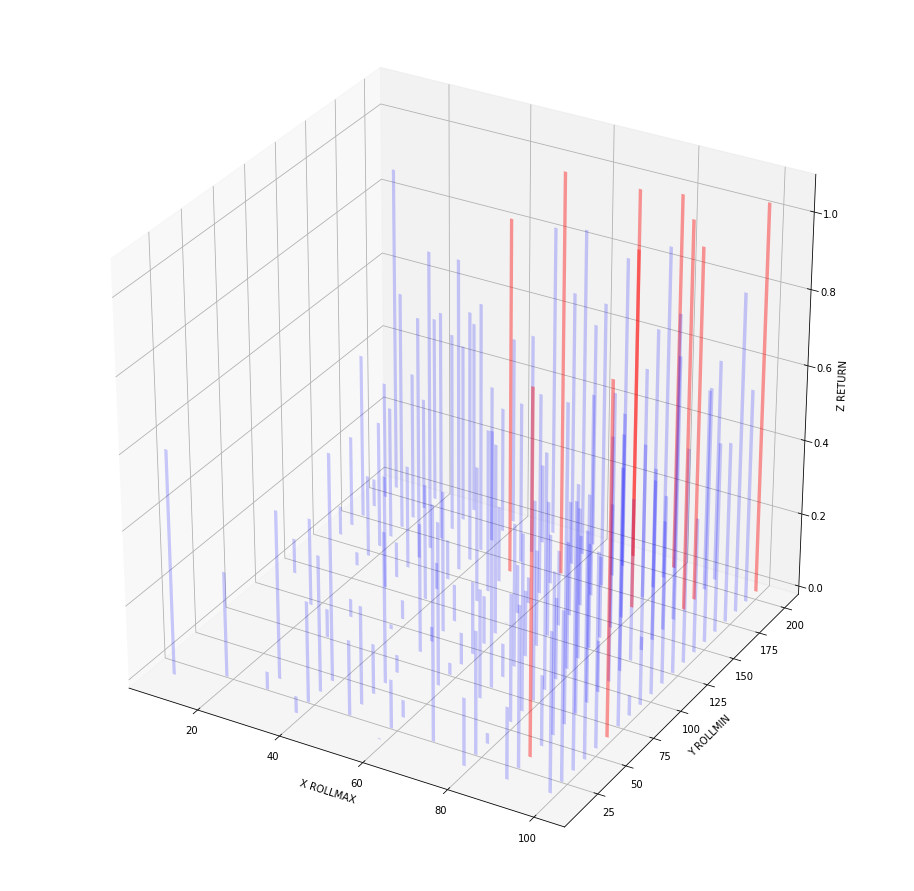

In [2]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# df = pd.read_csv('../database/2014-2018-TT-PARAMTEST-MA-ALLRANDOM.csv')
# df = pd.read_csv('../database/20181031-112659.csv')
# df = pd.read_csv('../database/2013-2018-ZZ500-TT-PARAMTEST.csv')
df = pd.read_csv('../database/2013-2018-ZZ500-MA-PARAMTEST.csv')

df.columns
# df.head(2)

df = df.loc[:, ['ROLLMAX', 'ROLLMIN', 'RETURN', 'MAXDROPDOWN', 'BENCHMARK_RETURN']]
# df

# d_df = df.groupby(by=['ROLLMAX', 'ROLLMIN']).describe().reset_index()
# d_df

# df = df.groupby(by=['ROLLMAX', 'ROLLMIN']).describe().reset_index()
df = df.groupby(by=['ROLLMAX', 'ROLLMIN']).mean().reset_index()
# df.columns
# df


X = df['ROLLMAX']
Y = df['ROLLMIN']
Z = df['RETURN']
# ax.scatter(X, Y, Z, c='b', marker='o')
# ax.bar(X, Z, zs=Y, zdir='y', color='b', alpha=0.2, hatch='', linestyle='dashdot')
# X, Y, Z = axes3d.get_test_data(0.05)
# X
# Z
# ax.plot_wireframe(X, Y, Z)

md = Z.median()
md = Z.mean()
md = Z.describe(percentiles=[.75, .90, .95])['95%']
# .norm.interval(0.96,mean,std)

df_d = df.loc[df['RETURN'] >= md]
df_d

X = df_d['ROLLMAX']
Y = df_d['ROLLMIN']
Z = df_d['RETURN']
# ax.scatter(X, Y, Z, c='r', marker='o')
ax.bar(X, Z, zs=Y, zdir='y', color='r', alpha=0.4)

df_d = df.loc[(df['RETURN'] < md) & (df['RETURN'] > 0)]
X = df_d['ROLLMAX']
Y = df_d['ROLLMIN']
Z = df_d['RETURN']
# ax.scatter(X, Y, Z, c='b', marker='^')
ax.bar(X, Z, zs=Y, zdir='y', color='b', alpha=0.2)

ax.set_xlabel('X ROLLMAX')
ax.set_ylabel('Y ROLLMIN')
ax.set_zlabel('Z RETURN')

# ax.set_yticks(Y)

df = df.loc[:, ['ROLLMAX', 'ROLLMIN', 'RETURN']]
# df[df['TURTLE_POS'] == 10]

In [ ]:
start_date = '2017-01-02'
end_date = '2018-08-01'
for today in pd.period_range(start=start_date, end=end_date, freq='D'):
    # 每年年初计算回报率
    if today.dayofyear == 1:
        today.strftime('%Y%m%d') == '20180101'
        print(today, type(today))
        print(today.year)
        print(today.end_time)
        print(today.qyear)
        print(today.start_time)
        lastyear_firstday = '%d-01-01' % (today.year - 1)
        lastyear_firstday = pd.to_datetime(lastyear_firstday)
        lastyear_firstday = lastyear_firstday.to_period(freq='D')
        print(lastyear_firstday, type(lastyear_firstday))
        

In [ ]:
%%time

# df = pd.DataFrame([1], columns=['A'])
# df

# df = pd.DataFrame(columns=['A'])
# for i in range(3000):
#     df = df.append({'A': i}, ignore_index=True)
# print(df)

# print([1]*10)
# r = np.random.randint(low=0, high=10, size=(1, 4))
# print(r)
r = [[3, 5, 7, 4]]

## Wall time: 2.78 s
# df = pd.DataFrame(r, columns=list('ABCD'))
# dd = pd.DataFrame(r, columns=list('ABCD'))
# de = pd.DataFrame(columns=list('ABCD'))
# for i in range(100 * 100):
#     dd = pd.Series({'A':1, 'B':2, 'C':3, 'D':4})
#     dd = de.append(dd, ignore_index=True)
# #     df = df.append(dd, ignore_index=True)
# #     df = df.append({'A':1, 'B':2, 'C':3, 'D':4}, ignore_index=True)
# #     dd = pd.DataFrame(r, columns=list('ABCD'))
# #     df = pd.concat([df, dd], ignore_index=True)
# print(len(df))
# print(dd)
# ### 714 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
# %timeit l = df.loc[df.A == 3]
# print(len(l))


### Wall time: 5 ms
r = {'A':3, 'B':5, 'C':7, 'D':4}
dd = []
for i in range(100 * 100):
    dd.append(r)
df = pd.DataFrame(dd, columns=list('ABCD'))
print(len(df))
# %timeit l = df.loc[df.A == 3]
%timeit l = df.loc[100]

# arr = df.to_records(index=False)
# arr.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], axis=0)
# print(len(arr))

# def find_s(dd):
#     ret = []
#     for i in range(len(dd)):
#         ci = dd[i]
#         if ci['A'] == 3 and ci['B'] == 5:
#             ret.append(i)
#     return ret
# ### 2.77 ms ± 63.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
# %timeit l = find_s(dd)
# print(len(l))

# df = pd.DataFrame([{'A':1, 'B':2}, {'A':3, 'B':4}], columns=list('AB'))
# print(df)

In [ ]:
df = pd.period_range(start='2018-01-01', end='2018-06-01', freq='D')
dt = pd.to_datetime('2018-06-01') - pd.to_datetime('2018-01-01')
dt.days
365 / dt.days

dt = pd.to_datetime('2018-06-01')
dt
df[0].to_timestamp()

d = dt - df[0].to_timestamp()
d.days

df[5]
df[0]
df[5] - df[0]

In [ ]:
df = pd.DataFrame(columns=['a', 'b'], data=[[1, 2], [3, 6], [5, 10]]*2)
df
set(df.a)
list(df.a)

df[df.a == 3]
df[df.a == 3].index
# %timeit len(df[df.a == 3])
# df.index.where(4)
df.index.get_loc(3)

n = df.values

n[df.index.get_loc(3)]

# n[n[:, 0] == 3]
# n[(n[:, 0] == 3) & (n[:, 1] == 6)]
# # %timeit len(n[n[:, 0] == 3])

# type(df.columns)

In [ ]:
%%timeit
df = pd.DataFrame(columns=['a', 'b'], data=[[1, 2], [3, 6], [5, 10]]*10)
# df['c'] = df.a[1:3] - df.b[1:3].values
print(df)

# df['c'] = pd.np.nan

# %timeit df.loc[:2, 'c'] = (df.a[1:3] - df.b[1:3].values).reset_index(drop=True)

# df.loc[3:5, 'c'] = df.a[1:3] - df.b[1:3].values

# df.c[3:5] = df.a[1:3] - df.b[1:3].values

# df.loc[3:5, 'c'] = df.a[1:3].values - df.b[1:3].values

# df[1:3].c = df.a[1:3] - df.b[1:3].values

# print(df)

# c = df.c[3:5]
# print(type(c))
# print(c)

# v = df.a[1:3].values - df.b[1:3].values
# print(type(v))
# print(v)

# s = df.a[1:3] - df.b[1:3].values
# print(type(s))
# print(s)
# print(s.reset_index(drop=True))
# df['c'] = df['c'].apply(lambda x: 'UP' if x < 0 else 'DOWN')
# df

# print(df['b'].shift(1))
# print(df['b'])
# s = df['b'] - df['b'].shift(1)
# s = s.reset_index(drop=True, inplace=True)
# s.shift(-1)
# print(s)

# print(df['b'].diff(1))
# print(df['b'].diff(4))

# %timeit df.loc[2, 'b'] - df.shift(2).loc[2, 'b']
# print(df.shift(2).loc[2])

# df['b'].rolling(2).mean()
# df['b'].rolling(10).max()
df['b'].rolling(10).min()

In [ ]:
import numpy as np
arr = np.array([[2,3,1,0], [2,3,1,0], [3,2,1,1]])
%timeit d = len(arr)
%timeit f = arr.shape[0]
%timeit c = d

In [ ]:
df = pd.DataFrame(columns=['a', 'b'], data=[[1, 2], [3, 6], [5, 10]]*1000)
# df

%timeit df['b'].rolling(10).min()
%timeit df.loc[:, 'b'].rolling(10).min()
%timeit df['b'].rolling(20).min()
# %timeit df['b'].rolling(20).min()
# %timeit min(df.loc[i-10:i, 'b'])

%timeit '2931' not in df.index

In [ ]:
%%timeit
for i in df.index:
    d = min(df.loc[i-10:i, 'b'])

In [ ]:
df = pd.DataFrame(columns=['a', 'b'], data=[[1, 2], [3, 6], [5, 10]]*3)
df = df.drop(index=5)
df

today = 6
df.shift(1).loc[today, 'b']